# `PyTorch`'s `nn.Embedding` class

## References
- [How should I understand the `num_embeddings` and `embedding_dim` arguments for `nn.Embedding`?](https://discuss.pytorch.org/t/how-should-i-understand-the-num-embeddings-and-embedding-dim-arguments-for-nn-embedding/60442) (pytorch forum)

---
tags: pytorch, tutorial, embedding, visualization

# Imports

In [33]:
import torch
from torch import tensor
from torch.nn import Embedding

import matplotlib.pyplot as plt
%matplotlib inline

# Embedding

In [27]:
num_embeddings = 10
embedding_dim = 2
emb = Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim)

# Values must be between `1` and `num_embeddings`

In [81]:
for i in range(num_embeddings+4):
    try:
        emb(torch.arange(i))
    except:
        print(f"failed for i={i}")

failed for i=11
failed for i=12
failed for i=13


# Input `tensor` can have any shape

In [29]:
try:
    emb(torch.randint(1, num_embeddings, size=(2,3,4,5,6)))
    print("it worked")
except:
    print("this won't print because this won't fail")

it worked


# Categorical value `a[i][j]` is mapped to vector `emb(a)[i][j]`

In [84]:
emb(torch.randint(0, num_embeddings, size=(2,3)))[0][0]

tensor([-0.3555,  0.3499], grad_fn=<SelectBackward>)

# `n` samples of `1` value each
The data points are connected in the plot, since they are organized in columns:

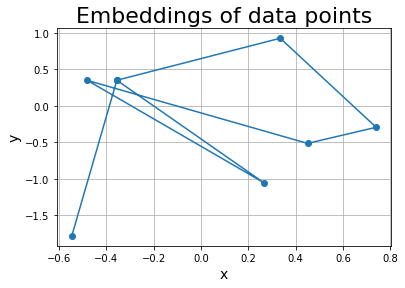

In [77]:
torch.manual_seed(12345)
n = 8
a = torch.randint(0, num_embeddings, size=(n,1))
with torch.no_grad(): A = emb(a)

plt.plot(A[:,:,0], A[:,:,1], 'o-');
plt.xlabel("x", fontsize=14);
plt.ylabel("y", fontsize=14)
plt.title("Embeddings of data points", fontsize=22);
plt.grid();

# Remark
At initialization, not all inputs are mapped to `num_embeddings` outputs.

# `1` sample of `n` values
The data points are not connected (and are plotted in different colors) because each pair of columns is plotted individually, and they have only 1 value:

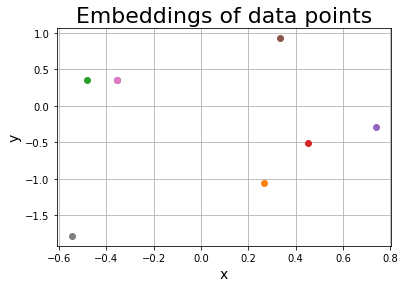

In [79]:
torch.manual_seed(12345)
n = 8
a = torch.randint(0, num_embeddings, size=(1, n))
with torch.no_grad(): A = emb(a)

plt.plot(A[:,:,0], A[:,:,1], 'o-');
plt.xlabel("x", fontsize=14);
plt.ylabel("y", fontsize=14)
plt.title("Embeddings of data points", fontsize=22);
plt.grid();

Same but as a `scatter` plot:

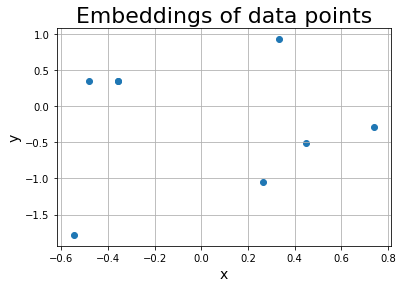

In [88]:
torch.manual_seed(12345)
n = 8
a = torch.randint(0, num_embeddings, size=(1, n))
with torch.no_grad(): A = emb(a)
    
plt.scatter(A[:,:,0], A[:,:,1]);
plt.xlabel("x", fontsize=14);
plt.ylabel("y", fontsize=14)
plt.title("Embeddings of data points", fontsize=22);
plt.grid();

# Color by label
Note that there are fewer embeddings than input samples at initialization, and therefore colors are superposed and do not correspond to values of individual points.  For visualization, we add some jitter, but the actual data points are indicated in the black dots:

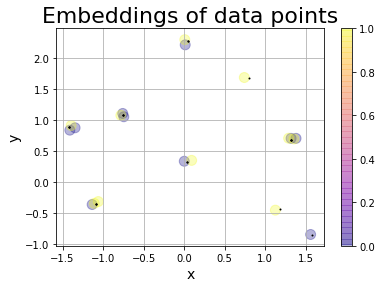

In [102]:
torch.manual_seed(42)

# Parameters
num_embeddings = 10
embedding_dim = 2
n = 20 # nb samples

# Data
x = torch.randint(0, num_embeddings, size=(n,1))
y = torch.cat([torch.zeros(n//2, 1), torch.ones(n-n//2, 1)]).int()


# Embedding
emb = Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim)

# Transforms
with torch.no_grad(): X = emb(x)

sigma = .04# for jitter
sc = plt.scatter(X[:,:,0]+sigma*torch.randn(n,1), X[:,:,1]+sigma*torch.randn(n,1), s=100, c=y, cmap='plasma', alpha=.3)
plt.scatter(X[:,:,0], X[:,:,1], color='k', s=1)


plt.colorbar(sc)
plt.xlabel("x", fontsize=14);
plt.ylabel("y", fontsize=14)
plt.title("Embeddings of data points", fontsize=22);
plt.grid();